In [1]:
%matplotlib notebook

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
1+1 

2

In [4]:
from github import Github

In [5]:
g = Github("username", "password")

In [6]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [7]:
contents = repo.get_contents("")

In [8]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [9]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [10]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [11]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

In [12]:
import bs4 as bs
import urllib.request

In [13]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [14]:
print(files[1])

﻿Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
Anhui,Mainland China,1/23/20 17:00,9,,
Beijing,Mainland China,1/23/20 17:00,22,,
Chongqing,Mainland China,1/23/20 17:00,9,,
Fujian,Mainland China,1/23/20 17:00,5,,
Gansu,Mainland China,1/23/20 17:00,2,,
Guangdong,Mainland China,1/23/20 17:00,32,,2
Guangxi,Mainland China,1/23/20 17:00,5,,
Guizhou,Mainland China,1/23/20 17:00,3,,
Hainan,Mainland China,1/23/20 17:00,5,,
Hebei,Mainland China,1/23/20 17:00,1,1,
Heilongjiang,Mainland China,1/23/20 17:00,2,,
Henan,Mainland China,1/23/20 17:00,5,,
Hong Kong,Hong Kong,1/23/20 17:00,2,,
Hubei,Mainland China,1/23/20 17:00,444,17,28
Hunan,Mainland China,1/23/20 17:00,9,,
Inner Mongolia,Mainland China,1/23/20 17:00,,,
Jiangsu,Mainland China,1/23/20 17:00,5,,
Jiangxi,Mainland China,1/23/20 17:00,7,,
Jilin,Mainland China,1/23/20 17:00,1,,
Liaoning,Mainland China,1/23/20 17:00,3,,
Macau,Macau,1/23/20 17:00,2,,
Ningxia,Mainland China,1/23/20 17:00,1,,
Qinghai,Mainland China,1/23/20 1

In [15]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [30]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


In [31]:
country_conf_dict  = {}
country_death_dict = {}
country_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
 
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
    
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])   
    print(country_perc_dict[CNT])   

63
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281.]
[3.10786106 2.80811232 2.83224401 2.99145299 2.70531401 2.85614768
 2.38095238 2.1875     2.1022867  2.17457887 2.17940088 2.17182048
 2.15648468 2.07199224 

 10. 33. 35. 44. 49. 53. 59. 62. 72.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         6.12244898 0.
 0.         0.         0.        ]
Cayman Islands
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
# Print the total number of reporting days we have
print(days)

63


<IPython.core.display.Javascript object>


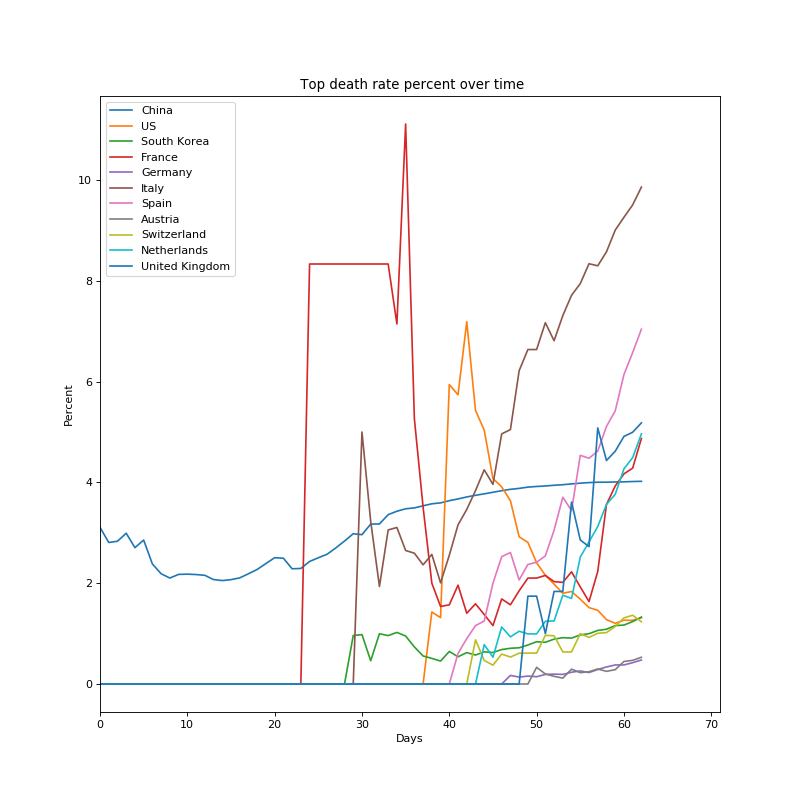

In [32]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top death rate percent over time")
ax.set_ylabel("Percent")
ax.set_xlabel("Days")

exclude_list = ['Iran', 0.0]   
    
# Daily total for all of the cities summed together
for CNT in country_conf_dict: 
    if (country_conf_dict[CNT][days-1] > 5000) and not(CNT in str(exclude_list)): 
        x = range(0,len(country_perc_dict[CNT]))
        y = country_perc_dict[CNT]  
        ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")



<IPython.core.display.Javascript object>


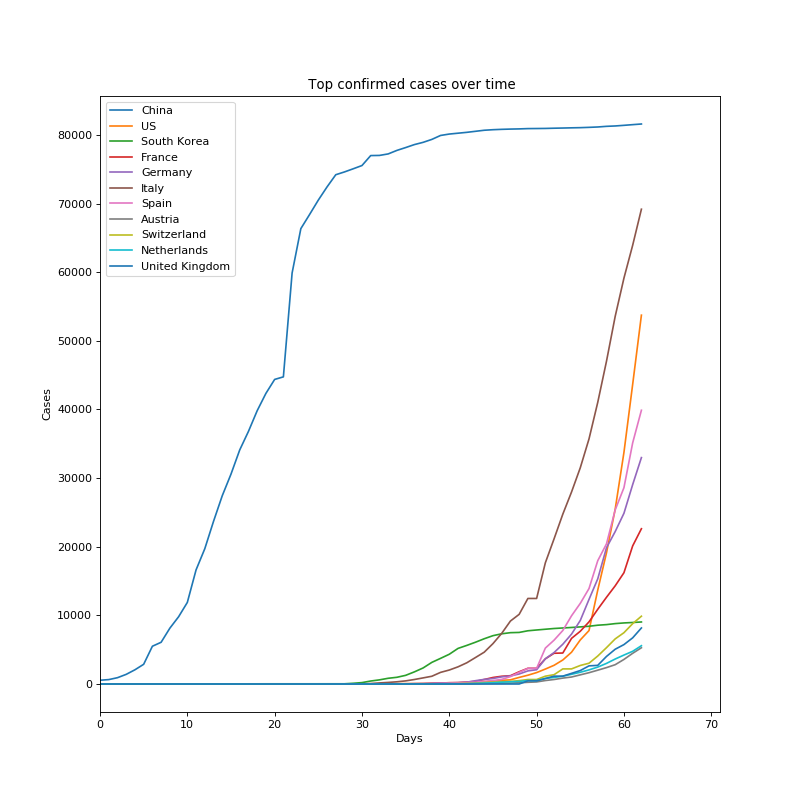

In [33]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top confirmed cases over time")
ax.set_ylabel("Cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 0.0]
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (country_conf_dict[CNT][days-1] > 5000) and not(CNT in str(exclude_list)): 
    #if ("Mainland"in CNT):
        x = range(0,len(country_perc_dict[CNT]))
        y = country_conf_dict[CNT]                
        ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")  

In [34]:
# What is the bounding box for the map
BBox = ( float(min(lon, key=float)),float(max(lon, key=float)), float(min(lat, key=float)),float(max(lat, key=float)) )
print(BBox)

# Print all of the coordinants
for i in range(len(lon)):
    print(con[i],lon[i], lat[i])

(-170.132, -1.0232, -38.4161, 72.0)
84.0 -4.0 40.0
36.0 -3.0 55.0
14.0 -79.3832 43.6532
9.0 -122.3321 47.6062
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
5.0 -102.0 23.0
3.0 -19.0208 64.9631
3.0 -87.6298 41.8781
3.0 -121.9552 37.3541
2.0 -51.9253 -14.235
2.0 -121.3542 38.4747
2.0 -120.9876 36.5761
2.0 -117.1611 32.7157
2.0 -121.8339 48.033
1.0 -73.5673 45.5017
1.0 -81.2453 42.9849
1.0 -70.1627 18.7357
1.0 -7.6921 53.1424
1.0 -71.0589 42.3601
1.0 -123.8695 40.745
1.0 -118.2437 34.0522
1.0 -89.4012 43.0731
1.0 -117.8531 33.7879
1.0 -122.675 45.5051
1.0 -71.4128 41.824
1.0 -98.4936 29.4241
1.0 -111.94 33.4255
0.0 -98.6134 29.3829
0.0 -95.9758 41.2545
0.0 -121.9399 38.2721
120.0 -4.0 40.0
40.0 -3.0 55.0
17.0 -79.3832 43.6532
14.0 -121.9836 47.548
9.0 -121.9552 37.3541
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
6.0 -19.0208 64.9631
5.0 -102.0 23.0
4.0 -87.6976 41.7377
4.0 -121.8339 48.033
2.0 -51.9253 -14.235
2.0 -8.2245 39.3999
2.0 -122.675 45.5051
2.0 -71.4128 41.824
2.0 -121.3542 38.4747


171.0 -19.0208 64.9631
164.0 -71.5301 42.2302
129.0 -7.6921 53.1424
115.0 -81.6868 27.7663
104.0 -85.3232 51.2538
131.0 -105.3111 39.0598
99.0 -83.6431 33.0406
91.0 -91.8678 31.1695
98.0 -74.521 40.2989
73.0 -127.6476 53.7267
93.0 -88.9861 40.3495
72.0 -97.5635 31.0545
74.0 -71.543 -35.6751
66.0 -77.2098 40.5908
45.0 -63.6167 -38.4161
45.0 -78.17 37.7693
43.0 -80.7821 8.538
43.0 -75.0152 -9.19
41.0 -102.5528 23.6345
39.0 -116.5765 53.9333
36.0 -122.0709 44.572
35.0 -93.9002 45.6945
34.0 -74.2973 4.5709
33.0 -84.5361 43.3266
33.0 -79.8064 35.6301
39.0 -86.6923 35.7478
32.0 -76.8021 39.0639
37.0 -82.7649 40.3888
28.0 -78.1834 -1.8312
28.0 -7.0926 31.7917
32.0 -89.6165 44.2685
27.0 -83.7534 9.7489
24.0 -73.5491 52.9399
24.0 -72.7554 41.5978
28.0 -111.8624 40.15
21.0 -122.6655 37.6489
24.0 -117.0554 38.3135
20.0 -86.2583 39.8494
20.0 -71.5118 41.6809
28.0 -80.945 33.8569
18.0 -93.2105 42.0115
20.0 -84.6701 37.6681
17.0 -98.2681 41.1254
16.0 -92.3731 34.9697
16.0 -77.0268 38.8974
13.0 -106.

2.0 -79.48474178 35.30885257
2.0 -80.52446628 35.64003916
2.0 -79.39976137 36.0434701
1.0 -78.00027268 35.36438125
1.0 -78.36914061 34.98820368
1.0 -81.21740317 35.48508185
1.0 -79.23651674 35.01888303
1.0 -80.21256572 35.79115496
1.0 -76.25134778 36.26723798
1.0 -79.17569362 35.47623147
1.0 -81.2132617 35.66211129
1.0 -76.60118385 36.12908077
1.0 -82.4766782 35.33788927
1.0 -79.1025053 34.64244496
1.0 -76.15180542 35.42017674
1.0 -78.65184241 36.30337451
1.0 -80.54496571 35.93099927
1.0 -79.90416657 35.33155144
1.0 -77.98422508 35.96575634
1.0 -79.4757978 34.8386299
83.0 -77.20358245 39.13676329
40.0 -76.8496441 38.83070039
28.0 -76.62911955 39.45784712
24.0 -76.61151012 39.30211911
24.0 -76.93126208 39.25305293
18.0 -76.60329337 39.00670238
5.0 -76.3077594 39.55010644
5.0 -76.98580666 38.51092331
4.0 -77.02373735 39.56453592
2.0 -76.56820632 38.53961642
2.0 -75.62705831 38.37301947
2.0 -75.33200012 38.21274277
1.0 -76.10882561 38.76618159
1.0 -77.39999394 39.47296601
1.0 -75.82904158

0.0 -91.51838643 39.52817427
0.0 -92.4971374 39.44007257
0.0 -93.98905745 39.3537468
0.0 -90.97009925 37.36085952
0.0 -90.85990261 36.65460667
0.0 -93.20259964 39.13734288
0.0 -92.52311943 40.46921489
0.0 -92.14709064 40.45214695
0.0 -91.40190382 37.15772072
0.0 -92.07634971 39.79742518
0.0 -93.77631447 38.03699437
0.0 -90.47598685 37.81214171
0.0 -90.1949941 37.89090059
0.0 -89.9444155 36.85571651
0.0 -93.45256475 36.75000327
0.0 -93.11150106 40.2099105
0.0 -93.04075153 36.65465345
0.0 -91.96564727 37.31728859
0.0 -94.34127305 37.8457799
0.0 -91.16124662 38.76529479
0.0 -90.87948158 37.96130078
0.0 -90.46001416 37.11303869
0.0 -92.876329 37.2813734
0.0 -94.42328751 40.47945588
0.0 -92.46914488 37.27029221
0.0 -112.8984694 45.13434354
0.0 -107.492347 45.42335905
0.0 -108.9582723 48.43175214
0.0 -109.0274047 45.22850116
0.0 -104.5395536 45.5197966
0.0 -110.4353362 47.88084126
0.0 -105.5737526 46.25319932
0.0 -105.5476343 48.78420029
0.0 -104.8944417 47.26584855
0.0 -113.073353 46.059533

5.0 -84.15375786 39.04847534
3.0 -92.18537045 33.89723187
0.0 -81.55204486 35.33553364
16.0 -97.32519562 35.20413532
1.0 -82.70432472 30.91395822
3.0 -89.42385254 38.60704876
0.0 -86.47277257 40.30319754
0.0 -90.53275096 41.89981633
0.0 -85.13377529 36.72581156
2.0 -84.60145248 42.94400871
1.0 -94.40465394 39.6013098
4.0 -73.67875352 44.74530905
1.0 -83.80852286 39.41485808
0.0 -77.63785995 41.23255967
0.0 -97.64925343 39.48028352
8.0 -90.60415045 34.22772299
0.0 -96.29798747 34.58840127
79.0 -84.5761255 33.94243204
1.0 -109.7516088 31.87934684
0.0 -102.82844990000001 33.60425307
1.0 -83.11828725 35.9278914
17.0 -111.77071780000001 35.83883429
1.0 -97.18827677 44.97788119
0.0 -85.98901039 31.39932826
1.0 -82.85492059999999 31.54892966
0.0 -86.07311784 35.49090731
0.0 -95.73379515 38.2365018
0.0 -100.5297533 31.88911733
0.0 -87.80168544 34.69847452
5.0 -92.27860244 38.50455671
0.0 -99.45240766 31.76736834
0.0 -88.22358557 39.51949084
0.0 -97.0868542 41.57486951
0.0 -104.64726740000002 3

0.0 -94.30552481 32.163959600000005
1.0 -105.7182065 39.120926000000004
0.0 -110.52643940000002 45.48965095
1.0 -109.58528249999999 44.52157546
0.0 -87.20375833 39.77202286
1.0 -97.80500621 32.77757172
0.0 -102.78446679999999 34.52993409
14.0 -82.40227529 28.30810945
1.0 -76.25134778 36.26723798
141.0 -74.29954144 41.03238628
0.0 -80.2865648 36.680163799999995
5.0 -84.86848792 33.91969522
0.0 -84.5801017 41.11676341
0.0 -99.23692334 38.18108732
0.0 -96.23705437 40.13141096
3.0 -96.70331759999999 36.31743373
0.0 -116.7647695 44.00545243
3.0 -96.97584944 36.07695283
3.0 -83.82937 32.56934316
12.0 -89.58677275 30.77090935
0.0 -102.72412609999999 30.78097267
0.0 -97.5523809 48.76623521
0.0 -89.78742322 36.2130572
0.0 -117.2741804 48.53234021
0.0 -77.90352133 34.52265624
0.0 -84.35599463 38.69607718
0.0 -79.35084086 38.68314479
0.0 -96.0370814 48.06642577
1.0 -102.8240777 44.0025835
3.0 -68.65020455 45.40194593
3.0 -89.76078901 40.78702156
0.0 -91.99949611 44.58307413
0.0 -101.6502942 40.85

2.0 -87.49055367 36.89267803
2.0 -93.18537118 36.9711783
0.0 -118.3394607 39.58105744
1.0 -107.998876 34.91131525
0.0 -102.5173885 36.74817177
9.0 -82.47614748 28.84804315
17.0 -122.2179634 45.18787398
2.0 -92.99526883 32.82308512
0.0 -90.90702196 31.97061673
1.0 -83.65947309 36.48319149
4.0 -123.92263190000001 48.04754642
1.0 -84.84819859999998 43.98794227
5.0 -80.21647898 33.66610974
0.0 -79.42413524 41.19265812
6.0 -93.17484713 34.04613432
0.0 -112.35057040000001 44.28496071
0.0 -87.78705622 39.33425789
5.0 -85.70510334 38.48015445
0.0 -99.81883015 37.23577007
2.0 -84.14615986 37.9689263
0.0 -91.73661677 40.41040752
212.0 -115.0130241 36.21458855
2.0 -83.78498252 39.91592258
0.0 -97.72925109 44.85834507
13.0 -122.48292040000001 45.77568046
0.0 -90.61207486 44.73483377
0.0 -87.83548597 31.68099859
16.0 -83.37124007 33.95436462
0.0 -93.78499767 41.02868181
0.0 -88.68896219999998 32.04158545
0.0 -77.99199425 39.11271747
1.0 -123.660711 45.99712889
0.0 -85.85836077 33.26984193
0.0 -90.4

3.0 -103.8093302 40.26279810000001
1.0 -83.49129491 33.59232073
0.0 -90.20255104 39.71654544
3.0 -86.44573375 39.47899078
0.0 -83.25558245 37.92465657
0.0 -92.88791859 38.4181765
0.0 -81.85308173 39.62081738
0.0 -84.64880098 36.13248031
0.0 -111.5727723 41.08830262
0.0 -78.26311676 39.55439028
0.0 -103.0061405 41.71711774
2.0 -96.65128437 38.68827511
204.0 -74.54553709999998 40.86095313
0.0 -94.73255695 33.11304005
0.0 -94.27341528 46.01265363
0.0 -82.7892599 40.52363560000001
0.0 -119.584546 45.41846568
0.0 -101.79925190000002 37.19141121
7.0 -101.2822377 46.71681782
0.0 -100.77972199999999 34.07408766
0.0 -88.62099969 39.64187451
0.0 -102.3555315 48.20197971
6.0 -92.75234549 43.67142874
2.0 -87.14632053 37.21425819
25.0 -122.4169351 45.54747959
0.0 -84.74993177 34.78897608
0.0 -95.76328482 44.02216709
0.0 -97.06826283 34.48116015
5.0 -91.11216970000001 41.48370744
3.0 -84.87142262 32.50931999
3.0 -86.15176712 43.29123859
0.0 -81.94363275 39.96575964
1.0 -95.37802952 35.61318461
0.0 -

In [77]:
BBox =  (-128, -64, 24, 49)
print(BBox)

(-128, -64, 24, 49)


In [78]:
repo = g.get_repo("ehsintegration/COVID-19")
contents = repo.get_contents("us-map.png")
url = contents.download_url
print(url)
usmap = plt.imread(url)

https://raw.githubusercontent.com/ehsintegration/COVID-19/master/us-map.png


<IPython.core.display.Javascript object>


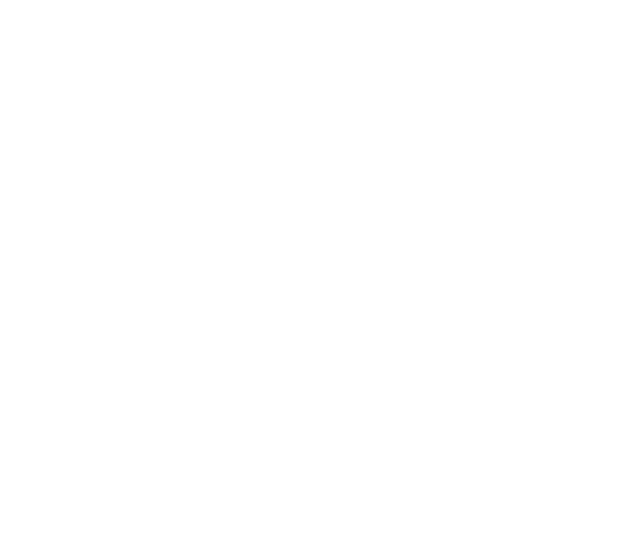

KeyboardInterrupt: 

In [79]:

fig, ax = plt.subplots(figsize = (8,7))
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

plt.ioff()
fig.show()
fig.canvas.draw()
ax.imshow(usmap, extent = BBox, aspect= 'equal')

# Wait so I had time to setup CAMSTASIA
time.sleep(2)

# Get the maximum Confirmed case
mxc = max(con, key=int)

# Iterate through all of the coordinates
for i in range(len(con)):
    
    # This will normalize the confirmed case to 1 , and then multiply by 300
    data_con = (con[i] / mxc) * 300
    
    # Get the current coordinates
    data_lon = lon[i]
    data_lat = lat[i]
    
    ax.scatter(data_lon, data_lat, zorder=1, alpha= 1.0, c='R', s=data_con)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # This slows the plot down so that we can see time progress
    # also matplotlib needs a sleep for an continuous plot.
    #time.sleep(0.00001)   #sleep

# Wait so I had time to stop CAMSTASIA
time.sleep(3)

# Clear the figure
fig.clf()